# Titanic
Let's start by understanding the data and we have some initial steps we can follow.

- **Understanding the problem**
- **Understanbding the data :** EDA, type of variables, any missing values, potential relationship between variables

In [4]:
import pandas as pd

data = pd.read_csv("/kaggle/input/titanic/train.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This is a binary classification problem. The goal is to predict whether a passenger survived the Titanic disaster. 

Let's analyze this data further. 

*  **Basic information about the dataset :** number of rows and columns, data types of the columns.
*  **Descriptive statistics of the dataset**
*  **Checking for any missing values**

In [12]:
print(data.info())
print("---")
print(data.describe(include="all"))
print("---")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
---
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
t

Here is a summary of our observations:

- There ara missing values. (Age,Cabin,Embarked). We will need to handle.
- The "PassengerID" column is just an identifier.It will not have any predictive power. We can ignore it during the modelling.
- The "Name" and "Ticket" columns are text fields. we might extract titles from name. It could give us additional information about social status or profession. 

*The next steps could include :*

- **Visualizing the data :** This could help us to understand the data better and uncover any patterns that might exist. 
- **Data Cleaning :** Handling missing values and outliers. 
- **Feature Engineering :** Creating new features from existing ones. It might help to improve the model's performance. 
- **Modeling :** Building and evaluating ML models using cross validation. We can also tune the models' hyperparameters to improve their performance.
- **Model interpretation :** Understanding the predictions of the model.


## Visualizing The Data

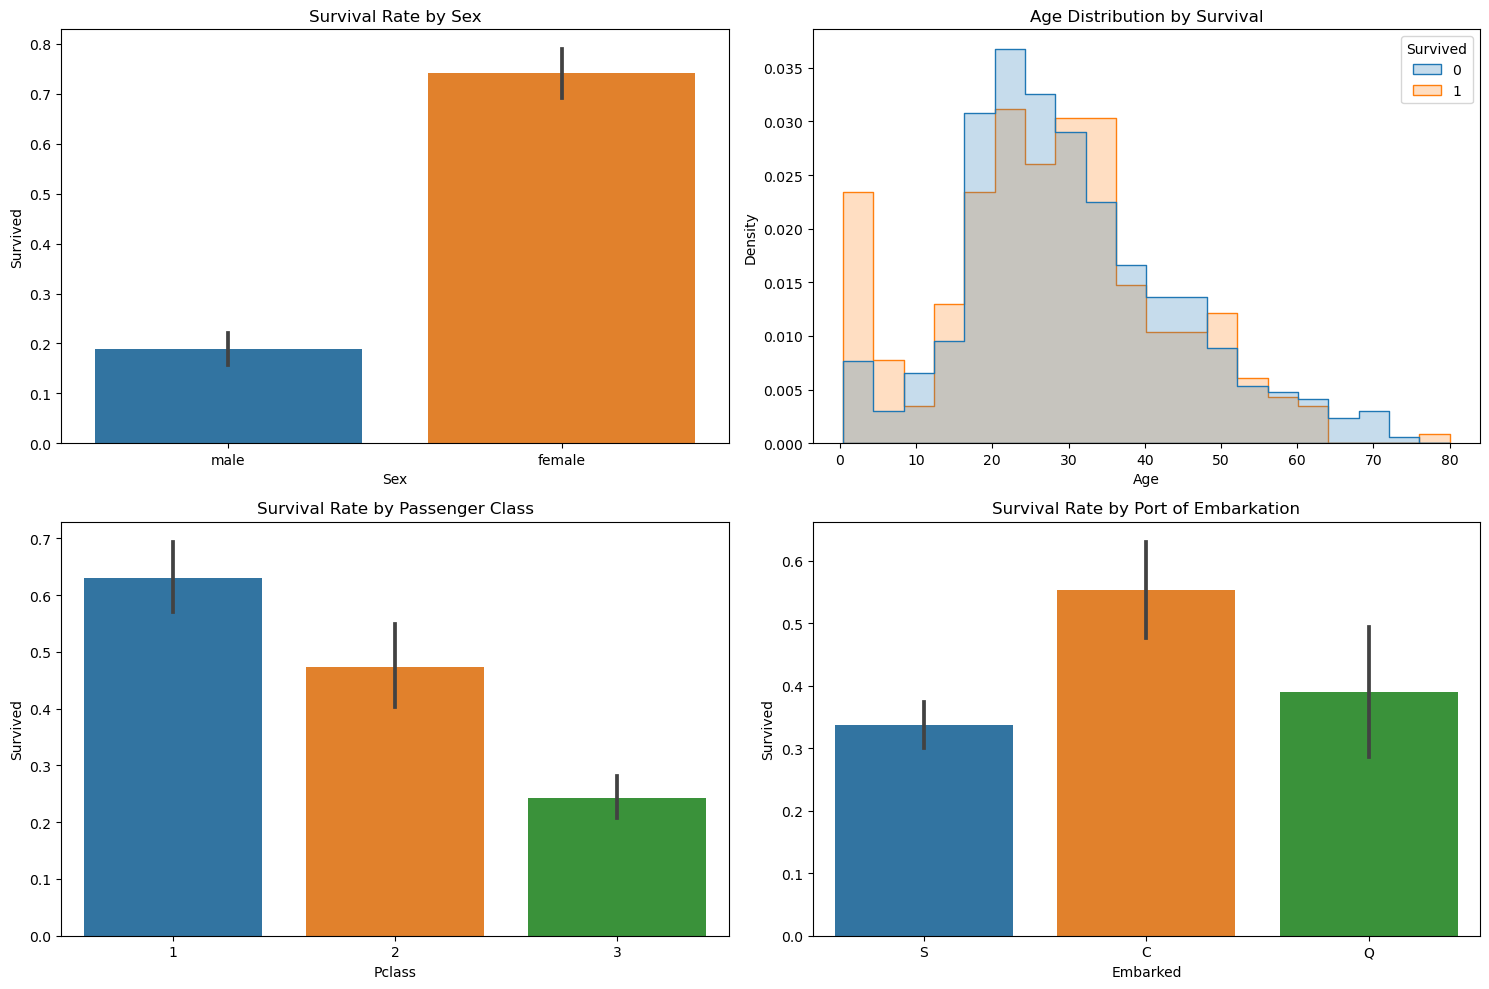

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure instance and subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Create the plots
sns.barplot(x="Sex", y="Survived", data=data, ax=axs[0, 0])
sns.histplot(data, x="Age", hue="Survived", element="step", stat="density", common_norm=False, ax=axs[0, 1])
sns.barplot(x="Pclass", y="Survived", data=data, ax=axs[1, 0])
sns.barplot(x="Embarked", y="Survived", data=data, ax=axs[1, 1])

# Set the titles for the plots
axs[0, 0].set_title('Survival Rate by Sex')
axs[0, 1].set_title('Age Distribution by Survival')
axs[1, 0].set_title('Survival Rate by Passenger Class')
axs[1, 1].set_title('Survival Rate by Port of Embarkation')

# Show the plots
plt.tight_layout()
plt.show()

Here are the insights from the plots:

* **Survival Rates by Sex :** Females had a much higher survival rate than males. The sex could be an important feature in our model.

* **Age Distribution by Survival :** We can see that a higher proportion of children survived. 

* **Survival Rate by Passenger Class :** Passengers in 1st class had a higher survival rate than others. 

* **Survival Rate by Port of Embarkation :** Passengers who embarked at Cherbour had a higher survival rate. 

We have visualized the data. We will move on to the next step: **data cleaning**. We will handle the missing values in the **"Age", "Cabin" and "Embarked"** columns. We will also **convert categorical variables into numerical** ones. ML models work better with  numerical variables. 

We could fill in missing values with median age and for Embarked.

## Data Cleaning  

In [22]:
# Fill missing values in 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most common port of embarkation
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Fill missing values in 'Cabin' with a new category 'Unknown'
data['Cabin'].fillna('Unknown', inplace=True)

# Check if there are any more missing values
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Feature Engineering 

We can create new features from existing ones.

* **Title :** Extracted from name
* **Famliy Size :** The sum of "SibSSp" and "Parch"
* **Is Alone :** A binary feature based on the Family Size
* **Age group :** Age binned into different age groups 
* **Cabin Letter :** The first letter of the 'Cabin' feature

In [23]:
# Feature Engineering

# 1. Title
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 2. Family Size
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# 3. Is Alone
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

# 4. Age Group
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'MiddleAged', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins, labels = labels)

# 5. Cabin Letter
data['CabinLetter'] = data['Cabin'].apply(lambda x: x[0])

# Display the first few rows of the data
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,AgeGroup,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,2,0,Adult,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,Adult,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,1,1,Adult,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,Adult,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr,1,1,Adult,U


In [24]:
# Convert 'Sex' into numerical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1}).astype(int)

# One-hot encode 'Title', 'AgeGroup', 'CabinLetter', and 'Embarked'
data = pd.get_dummies(data, columns=['Title', 'AgeGroup', 'CabinLetter', 'Embarked'])

# Display the first few rows of the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_U,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,1,0,0,1


Sex is coverted into a binary variable where  represnts "male" and 1 represents "female"

"Title" ,"AgeGroup", "CabinLetter", "Embarked" we applied one hot encoder technique. 

## Modeling

We will build our machine learning model. Here are the general steps we can follow.

**Split the data :** We will seperate our target variable("Survived") from the rest of the dataset and split the data into training and validation sets.

**Select a model :** We can start with a simple model like logistic regression and then try more complex models like random forsts and gradient boosing.

**Train the model :** We will fit the model on our training data

**Evaluateh the model :** We will use the validation set to evaluate the performance of our model. We can use accuracy as our evaluation metric.

**Tune the problem :** Depending on the results, we might want to tune our mudel by adjusting its parameters.

Before split the data, I will drop some columns.These include "PassengerID", "Name","Ticket","Cabin". They don't have predictive power.  

In [25]:
from sklearn.model_selection import train_test_split

# Drop the columns that we won't use
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Split the data into features (X) and the target variable (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and validation sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((712, 42), (179, 42), (712,), (179,))

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

We will use accuracy as our evaluatşon metric. Accuracy is the proportion of true results. 

In [27]:
from sklearn.metrics import accuracy_score

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate the accuracy score
accuracy = accuracy_score(y_val, y_pred)

accuracy

0.8100558659217877

The accuracy of our Logistic Regression model on the validation set is appx. 0.81. This is a good start, but we might be able to improve our model by trying more complex models such as Random Forest or Gradient Boosting or by tunning the hypeparameters of our model.

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Make predictions on the validation set
y_pred_rf = model_rf.predict(X_val)

# Calculate the accuracy score
accuracy_rf = accuracy_score(y_val, y_pred_rf)

accuracy_rf

0.7932960893854749

The accuracy of our Random Forest model on the validation set is appx. 0.79. This means that our model is slightly lower than that of the Logistic Regression model. The accuracy is just one metric. Depending on the problem, other metrics like precision,recall, or the AUC-ROC might be more approptiate. 

For our Random Forest model, some of the most important hyperparameters include:

* **n_estimators:** The number of trees in the forest.
* **max_depth:** The maximum depth of the trees.
* **min_samples_split:** The minimum number of samples required to split an internal node.
* **min_samples_leaf:** The minimum number of samples required to be at a leaf node.

We can significantly improve the performance of a model by optimizing the values of the model parameters. We can use a technique called **grid search** to systematically try different combinations of these hyperparameters.

In [30]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy', verbose=1)

In [33]:
# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

best_params, best_score


({'max_depth': 15,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.8398988287298041)

The best hyperparameters for our Random Forest model are:

* max_depth: 15
* min_samples_leaf: 4
* min_samples_split: 2
* n_estimators: 100

In [34]:
# Initialize a Random Forest model with the best parameters
model_rf_best = RandomForestClassifier(**best_params, random_state=42)

# Fit the model on the training data
model_rf_best.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf_best = model_rf_best.predict(X_val)

# Calculate the accuracy score
accuracy_rf_best = accuracy_score(y_val, y_pred_rf_best)

accuracy_rf_best


0.8324022346368715

---